## Big Data - Sagar Agarwal

I will be looking at this paper:
Cooper, Michael J., Huseying Gulen and Michael J. Schill, 2008,  Asset growth and the cross-section of stock returns, Journal of Finance 63, 1609-1651. 

Factor discussed in this paper is Asset growth which is defined as percent change of assets at t-1 and t-2 time.
Ref: https://krannert.purdue.edu/faculty/hgulen/asset_growth.pdf


Note: These results are just for data used by original paper. For the full sample results, refer to NewFactorsReplication_sa3633_hw6_fullsample.html

### Setting up the Dataset and Variable

Importing revelant packages

In [1]:
import os
os.chdir('C:\\Users\\dell\\Downloads\\b9334\\fire_pytools')  # Provide the new path here

In [2]:
import pandas as pd
import wrds
import time
from fire_pytools.portools.sort_portfolios import *
from fire_pytools.portools.find_breakpoints import *

Creating relevant breakpoint variables

In [3]:
import pandas as pd
from pylab import *
from matplotlib.pyplot import figure

from utils.monthly_date import *

from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios

desired_width = 10
pd.set_option('display.width', desired_width)


In [4]:
def calculate_new_factor(adata): #TODO: to be completed
    """
    Calculate asset growth
    """
    start_time = time.time()
    df = adata.copy()
    df['asset_lag']  = df.groupby('permno')['asset'].shift(1)
#    df['asset'] = df['asset'].notnull()
#    df.reset_index(level=0, inplace=True)
#    print(df[['permno', 'asset']][0:100])
    # Cumulative Return (adjusted) in 11 months
    lag_asset = df.groupby('permno')['asset_lag'].pct_change()
    return lag_asset
db = wrds.Connection(wrds_username='sagar520')  # make sure to configure wrds connector before hand.

Enter your WRDS username [dell]:sagar520
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [5]:
char_breakpoints = {'me': [0.3,0.7], 'asset_growth': [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

weightvar = 'melag'
retvar = 'retadj'

dict_factors = {'me': 'me', 'asset_growth': 'agf'}

In [6]:
### Get all data
# Annual Data
mdata = pd.read_pickle('../stock_monthly.pkl')
adata = pd.read_pickle('../stock_annual.pkl')

# Set names
adata.rename(columns={'mesum_june': 'me', 'inv_gvkey': 'inv'}, inplace=True) #inv_permco
mdata.rename(columns={weightvar: 'weightvar', retvar: 'retvar'}, inplace=True)

In [7]:
adata['asset'] = adata['lt']+ adata['seq']

In [8]:
query = "SELECT caldt as date, t30ret as rf FROM crspq.mcti"
rf = db.raw_sql(query, date_cols=['date'])
rf.set_index('date', inplace=True)

In [9]:
mdata['retadj'] = mdata['retvar']
adata['asset_growth'] = calculate_new_factor(adata)

In [10]:
adata[['permno', 'asset','asset_growth']][0:10]

permno  \
0   10000   
1   10000   
2   10001   
3   10001   
4   10001   
5   10001   
6   10001   
7   10001   
8   10001   
9   10001   

    asset  \
0     NaN   
1   2.115   
2     NaN   
3  12.242   
4  11.771   
5  11.735   
6  18.565   
7  18.881   
8  19.599   
9  22.286   

   asset_growth  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5     -0.038474  
6     -0.003058  
7      0.582020  
8      0.017021  
9      0.038028

Checking our dataset

In [74]:
adata.columns

Index(['gvkey', 'datadate', 'conm', 'fyear', 'fyr', 'at', 'capx', 'ceq',
       'cogs', 'dlc', 'ib', 'icapt', 'itcb', 'lt', 'mib', 'naicsh', 'pstk',
       'pstkl', 'pstkrv', 'sale', 'seq', 'sich', 'sstk', 'txdb', 'txdi',
       'txditc', 'xint', 'xsga', 'prba', 'be', 'op', 'opbe', 'inv', 'rankyear',
       'permno', 'permco', 'linkdt', 'linkenddt', 'inv', 'mejune', 'exchcd',
       'shrcd', 'ticker', 'siccd', 'me', 'medec', 'mesum_dec', 'beme',
       'sich_filled', 'asset', 'asset_growth'],
      dtype='object')

In [72]:
adata.head()

gvkey   datadate                          conm   fyear   fyr      at  \
0     NaN        NaT                           NaN     NaN   NaN     NaN   
1  013007 1986-10-31  OPTIMUM MANUFACTURING  -CL A  1986.0  10.0   2.115   
2     NaN        NaT                           NaN     NaN   NaN     NaN   
3  012994 1986-06-30               GAS NATURAL INC  1986.0   6.0  12.242   
4  012994 1987-06-30               GAS NATURAL INC  1987.0   6.0  11.771   

    capx    ceq    cogs    dlc     ...            mejune  exchcd  shrcd  \
0    NaN    NaN     NaN    NaN     ...       11734.59375     3.0   10.0   
1  0.240  0.418   0.511  0.968     ...               NaN     3.0   10.0   
2    NaN    NaN     NaN    NaN     ...        6033.12500     3.0   11.0   
3  0.551  5.432  19.565  0.343     ...        5822.12500     3.0   11.0   
4  0.513  5.369  15.538  0.377     ...        6200.00000     3.0   11.0   

   ticker   siccd        me        medec    mesum_dec      beme  sich_filled  
0   OMFGA  3990.0       NaN          NaN          NaN       NaN       3990.0  
1   OMFGA  3990.0       NaN  1981.546875  1981.546875  0.000211       3990.0  
2    GFGC  4920.0       NaN          NaN          NaN       NaN       4920.0  
3    GFGC  4920.0  5822.125  6937.000000  6937.000000  0.001014       4920.0  
4    GFGC  4920.0  6200.000  5828.000000  5828.000000  0.001208       4924.0  

[5 rows x 49 columns]

In [12]:
rf.head(5)

rf
date                
1925-12-31       NaN
1926-01-30  0.002951
1926-02-27  0.002768
1926-03-31  0.002778
1926-04-30  0.003072

Putting filters of SHRCH, Exchange, valid returns, Market Equity>0 and no null values in variable of interest

In [11]:
# valid return
# ------------
print('Data deleted due to missing return: %f' % np.round(mdata.retvar.isnull().mean()*100, 2))
rdata = mdata[mdata.retvar.notnull()]

Data deleted due to missing return: 3.340000


Trimming the dataset to one in the paper. The paper was written in 2004 hence it makes sense to trim data after 2004.

In [55]:
adata = adata[(adata['rankyear']>1968) & (adata['rankyear']<2004)]

In [56]:
# shrcd must be (10,11)
# ---------------------
print('Data deleted due to shrcd: %f' % np.round((1-adata.shrcd.isin([10, 11]).mean())*100, 2))
sort_data = adata[adata.shrcd.isin([10, 11])].copy()

Data deleted due to shrcd: 15.760000


In [57]:
# exchcd must be (1, 2, 3)
# ------------------------
print('Data deleted due to exchcd: %f' % np.round((1-sort_data.exchcd.isin([1, 2, 3]).mean())*100, 2))
sort_data = sort_data[sort_data.exchcd.isin([1, 2, 3])]

#del adata, mdata

Data deleted due to exchcd: 1.780000


In [58]:
# Portfolio Specif Filters
sortvars = [*char_breakpoints]

# Define the break point filters
# ------------------------------
bp_filters = [None] * len(sortvars)
bp_filters = dict(zip(sortvars, bp_filters))

In [107]:
sortvars


['me', 'asset_growth']

In [59]:
# Define the sample filter
# ------------------------

sample_filters = [None] * len(sortvars)
sample_filters = dict(zip(sortvars, sample_filters))

for sortvar in sortvars:
    bp_filters[sortvar] = (sort_data[sortvar].notnull())
    sample_filters[sortvar] = ((sort_data.me > 0) & (sort_data.mesum_dec > 0)  &(sort_data[sortvar].notnull()))

### Calculating Breakpounts

In [60]:
breakpoints = [None] * len(sortvars)
breakpoints = dict(zip(sortvars, bp_filters))

for sortvar in sortvars:
    breakpoints[sortvar] = find_breakpoints(data=sort_data[bp_filters[sortvar]],
                                            quantiles={sortvar: char_breakpoints[sortvar]},
                                            id_variables=['rankyear', 'permno', 'exchcd'],
                                            exch_cd=[1]
                                            )

NYSE breakpoints were calculated for me.
NYSE breakpoints were calculated for asset_growth.


### Sort Portfolio

Sorting the dataset baset on the breakpoints calculated

In [61]:
portsorts = [None] * len(sortvars)
portsorts = dict(zip(sortvars, bp_filters))

for sortvar in sortvars:
    portsorts[sortvar] = sort_portfolios(data=sort_data[sample_filters[sortvar]],
                                         quantiles={sortvar: char_breakpoints[sortvar]},
                                         id_variables=['rankyear', 'permno', 'exchcd'],
                                         breakpoints={sortvar: breakpoints[sortvar]}
                                         )

Stocks were sorted according to breakpoints, starting in 1969.0
Stocks were sorted according to breakpoints, starting in 1969.0


### Merge Portfolio

Merging the sorted dataset to monthly filtered data

In [62]:
port = portsorts['me'].copy()
for sortvar in sortvars[1:]:
    # Notice that this is an outer join
    port = port.merge(portsorts[sortvar], on=['permno', 'rankyear'], how='outer')
port_ret = pd.merge(port, rdata, on=['rankyear', 'permno'])

In [83]:
port_ret.head()

rankyear  \
0    1969.0   
1    1969.0   
2    1969.0   
3    1969.0   
4    1969.0   

    permno  \
0  10006.0   
1  10006.0   
2  10006.0   
3  10006.0   
4  10006.0   

  meportfolio  \
0         me2   
1         me2   
2         me2   
3         me2   
4         me2   

  asset_growthportfolio  \
0         asset_growth3   
1         asset_growth3   
2         asset_growth3   
3         asset_growth3   
4         asset_growth3   

        date  \
0 1969-07-31   
1 1969-08-29   
2 1969-09-30   
3 1969-10-31   
4 1969-11-28   

   dlret  \
0    NaN   
1    NaN   
2    NaN   
3    NaN   
4    NaN   

   dlretx  \
0     NaN   
1     NaN   
2     NaN   
3     NaN   
4     NaN   

   exchcd  \
0     1.0   
1     1.0   
2     1.0   
3     1.0   
4     1.0   

  naics  \
0  None   
1  None   
2  None   
3  None   
4  None   

    permco  \
0  22156.0   
1  22156.0   
2  22156.0   
3  22156.0   
4  22156.0   

     ...     \
0    ...      
1    ...      
2    ...      
3    ...      
4    ...      

   shrcd  \
0   10.0   
1   10.0   
2   10.0   
3   10.0   
4   10.0   

   shrout  \
0  5641.0   
1  5641.0   
2  5641.0   
3  5641.0   
4  5641.0   

    siccd  \
0  3743.0   
1  3743.0   
2  3743.0   
3  3743.0   
4  3743.0   

   ticker  \
0     ACF   
1     ACF   
2     ACF   
3     ACF   
4     ACF   

     retvar  \
0 -0.081081   
1  0.072941   
2  0.000000   
3  0.113889   
4  0.001995   

           me  \
0  239.742500   
1  253.845000   
2  253.845000   
3  282.755125   
4  279.934625   

   mesum_permco  \
0    239.742500   
1    253.845000   
2    253.845000   
3    282.755125   
4    279.934625   

   mesum  \
0    NaN   
1    NaN   
2    NaN   
3    NaN   
4    NaN   

    weightvar  \
0  260.896250   
1  239.742500   
2  253.845000   
3  253.845000   
4  282.755125   

     retadj  
0 -0.081081  
1  0.072941  
2  0.000000  
3  0.113889  
4  0.001995  

[5 rows x 22 columns]

### Factor Calculations

Calculating the factors based on the Fama French website.

In [63]:
def wavg(group, avg_name, weight_name):
    """ Source: http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    Calculates weighted average of a column in a dataset based on weight column
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()
idx = pd.IndexSlice

In [64]:
# Characteristic: ag
# --------------------
charvars = ['me','asset_growth']
ag_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(wavg, 'retvar', 'weightvar')
ag_ret = ag_ret.unstack(level=[1,2])
ag_ret['agf'] = ag_ret.loc[:,idx[:,'asset_growth10']].mean(axis=1) - ag_ret.loc[:,idx[:,'asset_growth1']].mean(axis=1)

In [65]:
for i in range(1,11):
    i = str(i)
    ag_ret['agf_'+i] = ag_ret.loc[:,idx[:,'asset_growth'+i]].mean(axis=1)

In [66]:
req_cols = ['agf']
for i in range(1,11):
    req_cols.extend(['agf_'+str(i)])
ag_ret[req_cols].describe()
agff = ag_ret[req_cols]

Merging all the factors into a file

In [67]:
agff.columns = [''.join(col).strip() for col in agff.columns.values]
agff.reset_index(inplace=True)

In [68]:
agff['mdate'] = agff.date.apply(monthly_date)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
ff = pd.read_csv('../ff_factors.csv')
import datetime
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4) 
    return next_month - datetime.timedelta(days=next_month.day)

ff['date'] = ff['date'].apply(lambda x: last_day_of_month(pd.to_datetime(str(x), format='%Y%m')))
ff.set_index('date', inplace=True)
ff_ret = ff/100

In [70]:
ff_ret = pd.merge(agff, ff_ret, on=['date'])
ff_ret.head(10)

date  \
0 1969-07-31   
1 1969-09-30   
2 1969-10-31   
3 1969-12-31   
4 1970-03-31   
5 1970-04-30   
6 1970-06-30   
7 1970-07-31   
8 1970-08-31   
9 1970-09-30   

        agf  \
0 -0.040424   
1  0.009186   
2  0.026527   
3  0.018487   
4 -0.055369   
5 -0.071243   
6 -0.028844   
7  0.012881   
8  0.031005   
9  0.112658   

      agf_1  \
0 -0.075179   
1 -0.029787   
2  0.072366   
3 -0.067442   
4  0.016031   
5 -0.118654   
6 -0.066427   
7  0.052308   
8  0.051620   
9  0.059003   

      agf_2  \
0 -0.073283   
1 -0.011265   
2  0.060279   
3 -0.036412   
4  0.006065   
5 -0.095961   
6 -0.051739   
7  0.094868   
8  0.052541   
9  0.061461   

      agf_3  \
0 -0.078088   
1 -0.030187   
2  0.072526   
3 -0.038766   
4  0.020221   
5 -0.116023   
6 -0.049248   
7  0.086344   
8  0.059974   
9  0.049856   

      agf_4  \
0 -0.066525   
1 -0.015008   
2  0.063716   
3 -0.030464   
4  0.004960   
5 -0.097153   
6 -0.063679   
7  0.085558   
8  0.056800   
9  0.051955   

      agf_5  \
0 -0.075860   
1 -0.025527   
2  0.061048   
3 -0.035614   
4 -0.004522   
5 -0.114713   
6 -0.063486   
7  0.079044   
8  0.053094   
9  0.071081   

      agf_6  \
0 -0.086852   
1 -0.036764   
2  0.067709   
3 -0.045758   
4  0.003397   
5 -0.105849   
6 -0.043003   
7  0.057217   
8  0.060460   
9  0.092344   

      agf_7  \
0 -0.074961   
1 -0.013541   
2  0.075973   
3 -0.013945   
4 -0.006613   
5 -0.147033   
6 -0.074843   
7  0.075379   
8  0.067767   
9  0.076853   

      agf_8  \
0 -0.077555   
1 -0.004748   
2  0.074102   
3 -0.022925   
4 -0.020038   
5 -0.149857   
6 -0.069382   
7  0.079727   
8  0.062827   
9  0.104294   

      agf_9  \
0 -0.099926   
1 -0.027757   
2  0.074893   
3 -0.035181   
4 -0.035796   
5 -0.140849   
6 -0.048743   
7  0.071294   
8  0.072095   
9  0.119416   

     agf_10  \
0 -0.115603   
1 -0.020601   
2  0.098893   
3 -0.048955   
4 -0.039338   
5 -0.189898   
6 -0.095270   
7  0.065190   
8  0.082625   
9  0.171661   

    mdate  \
0  196907   
1  196909   
2  196910   
3  196912   
4  197003   
5  197004   
6  197006   
7  197007   
8  197008   
9  197009   

   Mkt-RF  \
0 -0.0700   
1 -0.0298   
2  0.0506   
3 -0.0263   
4 -0.0106   
5 -0.1100   
6 -0.0579   
7  0.0693   
8  0.0449   
9  0.0418   

    SMB_t  \
0 -0.0337   
1  0.0129   
2  0.0389   
3 -0.0370   
4 -0.0240   
5 -0.0630   
6 -0.0217   
7 -0.0069   
8  0.0154   
9  0.0849   

    HML_t  \
0  0.0142   
1 -0.0319   
2 -0.0319   
3 -0.0302   
4  0.0425   
5  0.0639   
6  0.0087   
7  0.0096   
8  0.0103   
9 -0.0558   

    RMW_t  \
0  0.0140   
1  0.0342   
2  0.0001   
3  0.0247   
4 -0.0087   
5 -0.0064   
6  0.0019   
7 -0.0007   
8  0.0057   
9  0.0024   

    CMA_t  \
0  0.0197   
1 -0.0083   
2 -0.0203   
3 -0.0204   
4  0.0443   
5  0.0588   
6  0.0290   
7  0.0190   
8 -0.0015   
9 -0.0593   

     RF_t  
0  0.0053  
1  0.0062  
2  0.0060  
3  0.0064  
4  0.0057  
5  0.0050  
6  0.0058  
7  0.0052  
8  0.0053  
9  0.0054

### Comparing with Fama/French Factors

Importing FF factors from the Fama french website and setting it up to be compared to factors calculated by me.

Sumary statistics of the dataset. 'row_t' indicates the True Fama French factor and 'row' is my factor. Also one thing to note here is that fama french has returns scaled by a 100. This is not going to effect our correlation so I dont bother dividing them by 100 to match as of now.

In [71]:
ff_ret.set_index('date', inplace=True)

ff_ret.head()

agf  \
date                   
1969-07-31 -0.040424   
1969-09-30  0.009186   
1969-10-31  0.026527   
1969-12-31  0.018487   
1970-03-31 -0.055369   

               agf_1  \
date                   
1969-07-31 -0.075179   
1969-09-30 -0.029787   
1969-10-31  0.072366   
1969-12-31 -0.067442   
1970-03-31  0.016031   

               agf_2  \
date                   
1969-07-31 -0.073283   
1969-09-30 -0.011265   
1969-10-31  0.060279   
1969-12-31 -0.036412   
1970-03-31  0.006065   

               agf_3  \
date                   
1969-07-31 -0.078088   
1969-09-30 -0.030187   
1969-10-31  0.072526   
1969-12-31 -0.038766   
1970-03-31  0.020221   

               agf_4  \
date                   
1969-07-31 -0.066525   
1969-09-30 -0.015008   
1969-10-31  0.063716   
1969-12-31 -0.030464   
1970-03-31  0.004960   

               agf_5  \
date                   
1969-07-31 -0.075860   
1969-09-30 -0.025527   
1969-10-31  0.061048   
1969-12-31 -0.035614   
1970-03-31 -0.004522   

               agf_6  \
date                   
1969-07-31 -0.086852   
1969-09-30 -0.036764   
1969-10-31  0.067709   
1969-12-31 -0.045758   
1970-03-31  0.003397   

               agf_7  \
date                   
1969-07-31 -0.074961   
1969-09-30 -0.013541   
1969-10-31  0.075973   
1969-12-31 -0.013945   
1970-03-31 -0.006613   

               agf_8  \
date                   
1969-07-31 -0.077555   
1969-09-30 -0.004748   
1969-10-31  0.074102   
1969-12-31 -0.022925   
1970-03-31 -0.020038   

               agf_9  \
date                   
1969-07-31 -0.099926   
1969-09-30 -0.027757   
1969-10-31  0.074893   
1969-12-31 -0.035181   
1970-03-31 -0.035796   

              agf_10  \
date                   
1969-07-31 -0.115603   
1969-09-30 -0.020601   
1969-10-31  0.098893   
1969-12-31 -0.048955   
1970-03-31 -0.039338   

             mdate  \
date                 
1969-07-31  196907   
1969-09-30  196909   
1969-10-31  196910   
1969-12-31  196912   
1970-03-31  197003   

            Mkt-RF  \
date                 
1969-07-31 -0.0700   
1969-09-30 -0.0298   
1969-10-31  0.0506   
1969-12-31 -0.0263   
1970-03-31 -0.0106   

             SMB_t  \
date                 
1969-07-31 -0.0337   
1969-09-30  0.0129   
1969-10-31  0.0389   
1969-12-31 -0.0370   
1970-03-31 -0.0240   

             HML_t  \
date                 
1969-07-31  0.0142   
1969-09-30 -0.0319   
1969-10-31 -0.0319   
1969-12-31 -0.0302   
1970-03-31  0.0425   

             RMW_t  \
date                 
1969-07-31  0.0140   
1969-09-30  0.0342   
1969-10-31  0.0001   
1969-12-31  0.0247   
1970-03-31 -0.0087   

             CMA_t  \
date                 
1969-07-31  0.0197   
1969-09-30 -0.0083   
1969-10-31 -0.0203   
1969-12-31 -0.0204   
1970-03-31  0.0443   

              RF_t  
date                
1969-07-31  0.0053  
1969-09-30  0.0062  
1969-10-31  0.0060  
1969-12-31  0.0064  
1970-03-31  0.0057

In [72]:
ff_ret.describe()

agf  \
count  292.000000   
mean    -0.003449   
std      0.024023   
min     -0.075772   
25%     -0.017499   
50%     -0.002803   
75%      0.011544   
max      0.112658   

            agf_1  \
count  292.000000   
mean     0.011998   
std      0.060626   
min     -0.202180   
25%     -0.025708   
50%      0.012695   
75%      0.052308   
max      0.218866   

            agf_2  \
count  292.000000   
mean     0.013120   
std      0.049672   
min     -0.183853   
25%     -0.016821   
50%      0.016200   
75%      0.045251   
max      0.200573   

            agf_3  \
count  292.000000   
mean     0.012465   
std      0.046560   
min     -0.151057   
25%     -0.017365   
50%      0.017465   
75%      0.045524   
max      0.203933   

            agf_4  \
count  292.000000   
mean     0.012135   
std      0.045249   
min     -0.148109   
25%     -0.016128   
50%      0.016956   
75%      0.042904   
max      0.203477   

            agf_5  \
count  292.000000   
mean     0.011895   
std      0.046804   
min     -0.147825   
25%     -0.017829   
50%      0.013442   
75%      0.042474   
max      0.243391   

            agf_6  \
count  292.000000   
mean     0.012470   
std      0.046306   
min     -0.166540   
25%     -0.016544   
50%      0.015045   
75%      0.045629   
max      0.220944   

            agf_7  \
count  292.000000   
mean     0.012026   
std      0.050058   
min     -0.173126   
25%     -0.016238   
50%      0.018559   
75%      0.044907   
max      0.233776   

            agf_8  \
count  292.000000   
mean     0.012047   
std      0.052500   
min     -0.178154   
25%     -0.020381   
50%      0.014335   
75%      0.049028   
max      0.226185   

            agf_9  \
count  292.000000   
mean     0.011744   
std      0.058594   
min     -0.206485   
25%     -0.025314   
50%      0.013224   
75%      0.049097   
max      0.212390   

           agf_10  \
count  292.000000   
mean     0.008548   
std      0.066831   
min     -0.239696   
25%     -0.034620   
50%      0.011813   
75%      0.057687   
max      0.241385   

               mdate  \
count     292.000000   
mean   198661.020548   
std      1003.241218   
min    196907.000000   
25%    197805.750000   
50%    198657.500000   
75%    199507.250000   
max    200406.000000   

           Mkt-RF  \
count  292.000000   
mean     0.004951   
std      0.046855   
min     -0.160800   
25%     -0.023175   
50%      0.010300   
75%      0.038950   
max      0.161000   

            SMB_t  \
count  292.000000   
mean     0.001843   
std      0.034192   
min     -0.149100   
25%     -0.018475   
50%     -0.000100   
75%      0.021125   
max      0.183100   

            HML_t  \
count  292.000000   
mean     0.003561   
std      0.030689   
min     -0.099900   
25%     -0.013125   
50%      0.005800   
75%      0.018250   
max      0.129000   

            RMW_t  \
count  292.000000   
mean     0.003385   
std      0.026027   
min     -0.183700   
25%     -0.008125   
50%      0.002400   
75%      0.014000   
max      0.133100   

            CMA_t  \
count  292.000000   
mean     0.003021   
std      0.021631   
min     -0.065400   
25%     -0.010325   
50%      0.001850   
75%      0.015375   
max      0.095800   

             RF_t  
count  292.000000  
mean     0.005107  
std      0.002363  
min      0.000700  
25%      0.003800  
50%      0.004700  
75%      0.006400  
max      0.013500

Results look similar to the one in paper. We are doing for T = 1. However, it looks like we have overshot the returns of each decile by 0.05% to 0.1%.

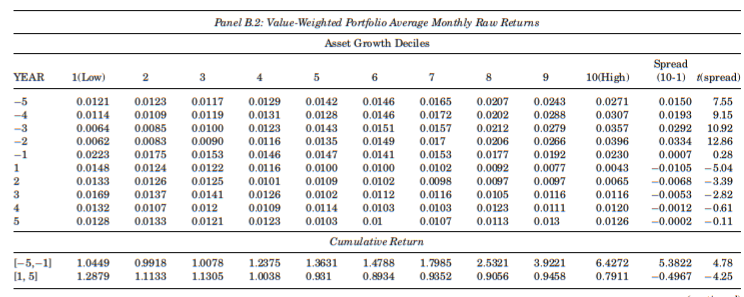

### Sharpe Ratios

In [86]:
ff_ret.columns
factors = ['agf', 'agf_1','agf_2', 'agf_3','agf_4','agf_5','agf_6','agf_7','agf_8','agf_9','agf_10','SMB_t','HML_t','RMW_t',
       'CMA_t']

In [87]:
print('Sharpe Ratios of the factors are as follows')
for i in factors:
    sharpe = np.mean(ff_ret[i]-ff_ret['RF_t'])/np.std(ff_ret[i])
    print(i, ':',sharpe)

Sharpe Ratios of the factors are as follows
agf : -0.3567658450640253
agf_1 : 0.11385316338152708
agf_2 : 0.16159004915163602
agf_3 : 0.15830550070630908
agf_4 : 0.15558537461238417
agf_5 : 0.1452853314016155
agf_6 : 0.15928366094473156
agf_7 : 0.1384532554290974
agf_8 : 0.13241386063871866
agf_9 : 0.11347021650263356
agf_10 : 0.05158453002732754
SMB_t : -0.0956063231254873
HML_t : -0.05046001803671262
RMW_t : -0.06628628079037978
CMA_t : -0.09659824598516249


Sharpe Ratio of the portfolio doesnt seem to be reported in the paper, but after looking the plots shown in the results below and similarity of return with the original paper, I am confident the sharpe ratios are similar too. 

### Correlations

I wanted to see if the new factor that we created was correlated to our previous alpha. My intuition is that it should not be highly correlated. We have learnt that if the factor is highly correlated then if makes no sense to run a regression on it.

In [75]:
sf = ['agf', 'SMB_t', 'HML_t', 'RMW_t', 'CMA_t']
ff_ret[sf].corr()[0:4][['agf', 'SMB_t', 'HML_t', 'RMW_t', 'CMA_t']]

agf  \
agf    1.000000   
SMB_t  0.013323   
HML_t -0.334490   
RMW_t  0.119938   

          SMB_t  \
agf    0.013323   
SMB_t  1.000000   
HML_t -0.215191   
RMW_t -0.380651   

          HML_t  \
agf   -0.334490   
SMB_t -0.215191   
HML_t  1.000000   
RMW_t  0.251983   

          RMW_t  \
agf    0.119938   
SMB_t -0.380651   
HML_t  0.251983   
RMW_t  1.000000   

          CMA_t  
agf   -0.480732  
SMB_t -0.139118  
HML_t  0.749305  
RMW_t  0.107156

### Plots

Here, we see that all the decile asset growth have similar return streams. 

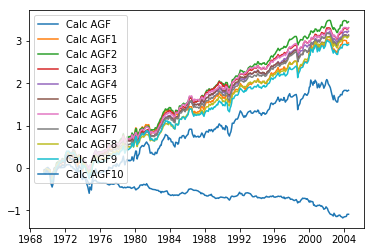

In [76]:
import matplotlib.pyplot as plt
plt.plot(np.log(1+ff_ret['agf']).cumsum(), label ='Calc AGF')
for i in range(1,11):
    plt.plot(np.log(1+ff_ret['agf_'+str(i)]).cumsum(), label ='Calc AGF'+str(i))
plt.legend(loc = 2)
plt.show()

### Comparing Alphas with Fama French

In [78]:
ff_ret['year'] = ff_ret.index
ff_ret['year'] = ff_ret['year'].map(lambda x: x.year)

In [79]:
from sklearn import linear_model
years=  [1968,1980,1991,2003]
t  = ['agf', 'agf_1','agf_2', 'agf_3','agf_4','agf_5','agf_6','agf_7','agf_8','agf_9','agf_10']
for i in range(3):
    print('Year '+str(years[i])+'-'+str(years[i+1]))
    data = ff_ret[(ff_ret['year']>years[i]) & (ff_ret['year']<=years[i+1])] 
    columns = ['RF_t', 'SMB_t', 'HML_t']
    df = data[columns]
    for j in t:
        target = data[j]
        lm = linear_model.LinearRegression()
        model = lm.fit(df,target)
        print(j,':',lm.intercept_)

Year 1968-1980
agf : -0.00236137281048385
agf_1 : 0.02977468304383371
agf_2 : 0.02882955859552571
agf_3 : 0.029664093538972258
agf_4 : 0.03153508483754431
agf_5 : 0.03308009248242687
agf_6 : 0.03301451121529561
agf_7 : 0.030197416712394134
agf_8 : 0.030541206231958593
agf_9 : 0.03086138256370439
agf_10 : 0.027413310233349857
Year 1980-1991
agf : 0.0049297467406422685
agf_1 : 0.005777929526071483
agf_2 : 0.013096847267794077
agf_3 : 0.015442060623150792
agf_4 : 0.016281948251972243
agf_5 : 0.013875572524560509
agf_6 : 0.014640328428127554
agf_7 : 0.010226681164534783
agf_8 : 0.010865335736168843
agf_9 : 0.010358234767446031
agf_10 : 0.01070767626671373
Year 1991-2003
agf : -0.010018577982572002
agf_1 : 0.0015456077903829996
agf_2 : 0.0055341435976325685
agf_3 : 0.004126174087482564
agf_4 : 0.005224242917598374
agf_5 : 0.005179216725989681
agf_6 : 0.005461108169043685
agf_7 : -0.0007908366943805787
agf_8 : 0.003791946243333656
agf_9 : -0.0016209825330124432
agf_10 : -0.008472970192189015

The results in the paper are as follows. They are coherant with what we get above.
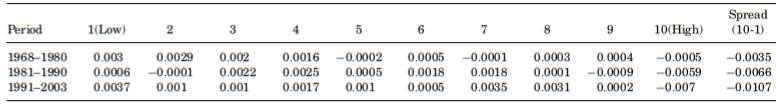

Even though the paper has not compared with 5 factor Fama French, the alphas are as follows:

In [80]:
for i in range(3):
    print('Year '+str(years[i])+'-'+str(years[i+1]))

    data = ff_ret[(ff_ret['year']>years[i]) & (ff_ret['year']<=years[i+1])] 
    columns = ['RF_t', 'SMB_t', 'HML_t', 'RMW_t', 'CMA_t']
    df = data[columns]
    for j in t:
        target = data[j]
        lm = linear_model.LinearRegression()
        model = lm.fit(df,target)
        print(j,':',lm.intercept_)

Year 1968-1980
agf : -0.004182968188151917
agf_1 : 0.03654658348816308
agf_2 : 0.0335526221500295
agf_3 : 0.03590565445693739
agf_4 : 0.03707656659441488
agf_5 : 0.038074720965591155
agf_6 : 0.0374735999613719
agf_7 : 0.03423792887476066
agf_8 : 0.03456254915083124
agf_9 : 0.03611044995676568
agf_10 : 0.03236361530001117
Year 1980-1991
agf : 0.006951509507945984
agf_1 : 0.01139004489239601
agf_2 : 0.017770073106710478
agf_3 : 0.01943538120859776
agf_4 : 0.020614953875830254
agf_5 : 0.01835537158758942
agf_6 : 0.019782530699435977
agf_7 : 0.015978498692876365
agf_8 : 0.0150448592690617
agf_9 : 0.01709821189958123
agf_10 : 0.018341554400341964
Year 1991-2003
agf : -0.008660445380218153
agf_1 : 0.010601953810751505
agf_2 : 0.011993097871657015
agf_3 : 0.011409081280305265
agf_4 : 0.011280804218688519
agf_5 : 0.011567439216174213
agf_6 : 0.011603592505609907
agf_7 : 0.0064231429247384435
agf_8 : 0.011698583054782264
agf_9 : 0.007548050925219428
agf_10 : 0.0019415084305333414
